<a href="https://colab.research.google.com/github/Joel-Him/Excel/blob/main/LinearRegress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import statsmodels.api as sm


df = pd.read_csv("https://raw.githubusercontent.com/Joel-Him/Excel/main/01%20OcuHos.csv")
#df = pd.read_csv("https://drive.google.com/file/d/1Q1OKfbHsv7vWvkAlivysbkIH15Y_fq70/view?usp=drive_link")
x = df['t1'].head(20)
y = df['Valor'].head(20)
y


0     77
1     81
2     86
3     87
4     83
5     88
6     86
7     89
8     88
9     89
10    88
11    87
12    87
13    92
14    92
15    87
16    87
17    91
18    90
19    86
Name: Valor, dtype: int64

In [3]:
# Agregar una constante (intercepto) a la matriz X
X = sm.add_constant(x)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los parámetros del modelo
coeficientes = model.params

# Imprimir la ecuación de la línea recta
intercepto, pendiente = coeficientes[0], coeficientes[1]
print(f"Ecuación de la línea recta: y = {pendiente:.2f}x + {intercepto:.2f}")
model.summary()

df.describe()
#stat
#p_valor
#print(f"Ecuación de la línea recta: y = {stat:.2f}x + {p_valor:.2f}")


Ecuación de la línea recta: y = 0.38x + 83.05


,Valor,t,t1
count,20.00000,20.00000,20.00000
mean,87.05000,225.50000,10.50000
std,3.56112,5.91608,5.91608
min,77.00000,216.00000,1.00000
25%,86.00000,220.75000,5.75000
50%,87.00000,225.50000,10.50000
75%,89.00000,230.25000,15.25000
max,92.00000,235.00000,20.00000


In [4]:
from scipy import stats
stats.shapiro(df['Valor'])

ShapiroResult(statistic=0.8895145654678345, pvalue=0.026345519348978996)

In [5]:
X_test = x  # Nuevos datos independientes

# Agregar una constante (intercepto) a la matriz X_test
X_test = sm.add_constant(X_test)

# Obtener valores predictivos para los nuevos datos
y_pred = model.predict(X_test)
y_pred

0     83.428571
1     83.809774
2     84.190977
3     84.572180
4     84.953383
5     85.334586
6     85.715789
7     86.096992
8     86.478195
9     86.859398
10    87.240602
11    87.621805
12    88.003008
13    88.384211
14    88.765414
15    89.146617
16    89.527820
17    89.909023
18    90.290226
19    90.671429
dtype: float64

In [6]:
dif = abs(y - y_pred)
mae_rl = sum(dif)/len(dif)
mae_rl

2.245263157894738

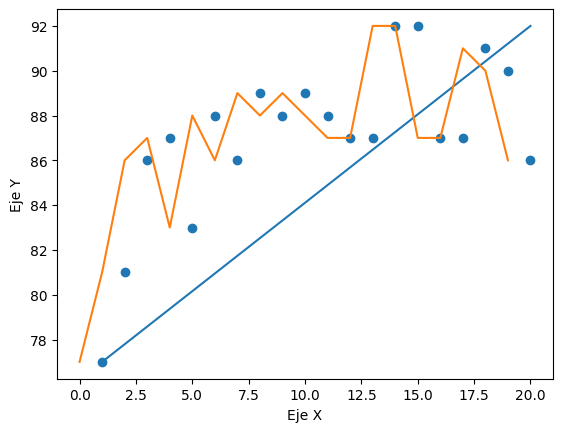

In [7]:
import matplotlib.pyplot as plt
min_x = min(x)
max_x = max(x)
min_y = min(y)
max_y = max(y)

# Crear un gráfico de dispersión con líneas que conectan los mínimos y máximos
plt.plot([min_x, max_x], [min_y, max_y], df['Valor'])

plt.scatter(x, y)

# Etiquetas de los ejes
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar el gráfico
plt.show()
#df.plot()